# Ant Colony Optimization

Ant Colony Optimization (ACO) is a Swarm Intelligence (SI) algorithm that has been introduced as an approach to solve combinatorial optimization problems, such as routing problems.

You may be already familiar with the Traveling Salesman Problem (TSP) where the goal is to find the shortest path traversing all nodes on a given graph. A generalization of the TSP is the Vehicle Routing Problem (VRP - or Truck Dispatching Problem as first introduced [1]) where the goal is to find the optimal set of routes for a fleet of vehicles to traverse in order to deliver to a given set of customers.

ACO is inspired by the ants' foraging behaviour. Each ant (leaving the nest) performs a search towards a random direction until it finds a food source. Then, it returns to the nest. The path leading to the food source is "marked", because the ant leaves behind a trace of pheromone while exploring. The pheromone can be detected by other ants. Thus, it is more possible for other ants starting their search to follow this "marked" path, since the pheromone is indicating a food source exists in that direction. Every new ant following this path applies an additional layer of pheromone on it. As a result, the more ants traversing the path the more pheromone is applied to it. On the other hand, if no food source has been found the pheromone scent is decreased because pheromone is gradually evaporated.

On the algorithmic equivalent, every agent (or candidate solution) is an ant performing a search in the solution space. The "paths" created by the agent denote a sequence of nodes. Below, you can see the application of the ACO concept on the simplest routing problem, i.e., the Traveling Salesman Problem (TSP).

[1] Dantzig, G. B., & Ramser, J. H. (1959). The truck dispatching problem. *Management science*, 6(1), 80-91. https://doi.org/10.1287/mnsc.6.1.80

### Traveling Salesman Problem (TSP)

This is a combinatorial problem depicted by a graph (a network), where the graph's nodes represent (a) depots and (b) customers.


So, let's create a random graph:

In [1]:
import numpy as np
import random

# create n random nodes on a 20x20 grid
nodes_number = 10
nodes = []
x = []
y = []
for _ in range(nodes_number):
  x.append(random.uniform(-10, 10))
  y.append(random.uniform(-10, 10))

# convert lists to arrays to enable their manipulation with numpy
x = np.array(x)
y = np.array(y)

# then, we can construct the "matrix" nodes containing each node's coordinates
nodes = np.vstack((x,y))
nodes = nodes.T
print(nodes)

[[ 9.54820602  7.51784029]
 [-6.35381719  9.85803056]
 [-2.37082887  8.88286698]
 [-2.35135473  3.93479193]
 [-4.74026081  0.19012717]
 [ 4.90037919 -8.21560629]
 [ 3.08839797 -9.81667678]
 [ 2.30609712  1.83594057]
 [ 7.53440965  2.46475685]
 [ 6.61670514  8.28564853]]


and by using `matplotlib` we will demonstrate the graph:

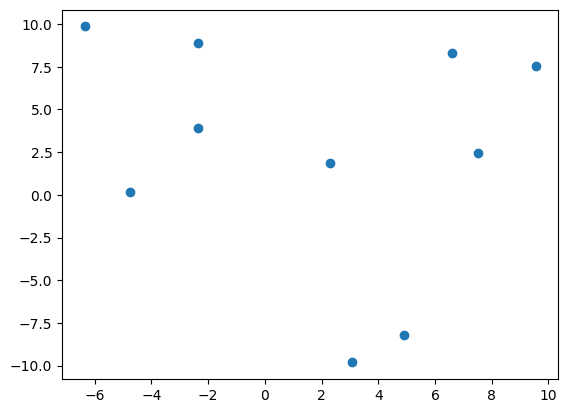

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
#plt.plot(x,y)
plt.show()

The first thing we need is the distance matrix $[d_{ij}]$, including the distance between every $i$ and $j$ node.

In [3]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform


distanceMatrix = pdist(nodes)
print(squareform(distanceMatrix))

[[ 0.         16.07329565 11.99694506 12.42729985 16.05788479 16.40559769
  18.49904327  9.20500547  5.43957976  3.03038396]
 [16.07329565  0.          4.10062678  7.14873847  9.80162845 21.2911551
  21.82314221 11.80457724 15.73351013 13.06548257]
 [11.99694506  4.10062678  0.          4.94811336  9.00987975 18.58031902
  19.48014616  8.45770705 11.80279153  9.00735463]
 [12.42729985  7.14873847  4.94811336  0.          4.4417774  14.14990537
  14.78829947  5.10852569  9.99446549  9.96775054]
 [16.05788479  9.80162845  9.00987975  4.4417774   0.         12.7905549
  12.70527542  7.23601146 12.48364831 13.94697608]
 [16.40559769 21.2911551  18.58031902 14.14990537 12.7905549   0.
   2.41799558 10.38093897 11.00037606 16.59027383]
 [18.49904327 21.82314221 19.48014616 14.78829947 12.70527542  2.41799558
   0.         11.67884779 13.06141768 18.44296974]
 [ 9.20500547 11.80457724  8.45770705  5.10852569  7.23601146 10.38093897
  11.67884779  0.          5.26599106  7.75758173]
 [ 5.43957

To make it more presentable, we can print it as a dataframe using `pandas`

In [4]:
import pandas as pd
from scipy.spatial import distance_matrix

df = pd.DataFrame(nodes, columns=[nodes[0]])
Distance_Matrix = pd.DataFrame(distance_matrix(df.values, df.values))
Distance_Matrix

0          1          2          3          4          5  \
0   0.000000  16.073296  11.996945  12.427300  16.057885  16.405598   
1  16.073296   0.000000   4.100627   7.148738   9.801628  21.291155   
2  11.996945   4.100627   0.000000   4.948113   9.009880  18.580319   
3  12.427300   7.148738   4.948113   0.000000   4.441777  14.149905   
4  16.057885   9.801628   9.009880   4.441777   0.000000  12.790555   
5  16.405598  21.291155  18.580319  14.149905  12.790555   0.000000   
6  18.499043  21.823142  19.480146  14.788299  12.705275   2.417996   
7   9.205005  11.804577   8.457707   5.108526   7.236011  10.380939   
8   5.439580  15.733510  11.802792   9.994465  12.483648  11.000376   
9   3.030384  13.065483   9.007355   9.967751  13.946976  16.590274   

           6          7          8          9  
0  18.499043   9.205005   5.439580   3.030384  
1  21.823142  11.804577  15.733510  13.065483  
2  19.480146   8.457707  11.802792   9.007355  
3  14.788299   5.108526   9.994465   9.967751  
4  12.705275   7.236011  12.483648  13.946976  
5   2.417996  10.380939  11.000376  16.590274  
6   0.000000  11.678848  13.061418  18.442970  
7  11.678848   0.000000   5.265991   7.757582  
8  13.061418   5.265991   0.000000   5.892789  
9  18.442970   7.757582   5.892789   0.000000

We can observe that:

$d_{ij} = d_{ji}$

Meaning that the travelling *cost* from $i$ to $j$ is equal to the travelling *cost* from $j$ to $i$. This is not trivial. On an artificial scenario, we may assume this applies to simplify the problem. But in reality, the distances are not equal. <font color='red'>(Why?)</font> When this assumption applies, we consider the problem to be a ***Symmetric TSP***.

**Important:** note that we refer to travelling *cost* and not *distance*, because it is not always the case that we measure the travelling cost from $i$ to $j$ node in distance units. It may be fuel cost or time, for example.

Also, the diagonal of the matrix above is as follows:

$d_{ii} = 0$

because it represents the distance of each $i$ node to itself.

The Traveling Salesman Problem can be described by a graph $𝐺(𝑉, 𝐴)$, where $𝑉 = {0, 𝑁}$ represents the set of nodes and $𝐴 = {(𝑖,𝑗)|𝑖,𝑗 ∈ 𝑉, 𝑖 ≠ 𝑗}$ represents the set of arcs.

Usually, in the set $𝑉$, the starting node (depot) is denoted by 0 and the subset $𝑁$ is defined as $𝑁 = {1,2,3, … , 𝑛}$, where $𝑛$ is the total number of the graph's nodes (except the starting one).

The goal of this problem is finding the shortest (closed) path traversing all the graph's nodes. In other words, the goal is to find the shortest path to be traversed by the salesman, so that they visit all cities (nodes) and returns to the starting node.

The problem's (mathematical) formulation is given below:

\begin{align}
\text{min} \quad & \sum_{i = 1}^{n} \sum_{j = 1, j \neq i}^{n} c_{ij} x_{ij}, \\
\text{subject to} \\
& \sum_{i=1, i \neq j}^{n} x_{ij} = 1, \quad j=1,2,…,n,\\
& \sum_{j=1, j \neq i}^{n} x_{ij} = 1, \quad i=1,2,…,n,\\
\end{align}

The decision variables $𝑥_{𝑖𝑗}$ are binary variables, where:
\begin{equation}
  x_{ij} =
    \begin{cases}
      1 & \text{if the arc <$𝑖,𝑗$> is part of the solution}\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}

The objective function minimizes the total travelling cost. In our case study, $[c_{ij}]=[d_{ij}]$ since we consider the travelling cost from $i$ to $j$ to be equal to the distance of the arc <$𝑖,𝑗$>.

An important step (for every Evolutionary Computation-oriented approach) is to define the **solution representation**.

Let us consider a graph with 5 nodes and a random solution (tour):

In [5]:
random_tour = np.random.permutation(5)
random_tour

array([2, 0, 1, 4, 3])

The (binary) matrix $[x_{ij}]$ should contain ones (1) in the matrix elements that correspond to "*going from node $i$ to node $j$*", i.e., the corresponding $(i,j)$ matrix element.

In [6]:
x_ij = np.zeros((5,5))
x_ij

print('The tour is:')
[print(' %d' %random_tour[i],'->', end = '') for i in range(len(random_tour))]
print(' %d' %random_tour[0])

for i in range(len(random_tour)):
    if i == len(random_tour)-1:
        # the last array element does not correspond to the last tour's node, since the salesman has to return to the starting node
        x_ij[random_tour[i]][random_tour[0]] = 1
    else:
        x_ij[random_tour[i]][random_tour[i+1]] = 1
print('\nand the decision variables [x_ij]:')
x_ij

The tour is:
 2 -> 0 -> 1 -> 4 -> 3 -> 2

and the decision variables [x_ij]:


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

Thus, if we create a random distance matrix:

In [7]:
Dij = np.random.rand(5,5)
# ..where we ensure all elements on the diagonal are equal to zero
np.fill_diagonal(Dij, 0)
Dij

array([[0.        , 0.47538312, 0.91704432, 0.19716899, 0.99843455],
       [0.71529928, 0.        , 0.49810929, 0.51399196, 0.7397515 ],
       [0.17559555, 0.97933987, 0.        , 0.21256295, 0.39634761],
       [0.75417856, 0.89571657, 0.8380116 , 0.        , 0.71162366],
       [0.19304111, 0.56724069, 0.4467007 , 0.20498496, 0.        ]])

the above (random) solution has a quality (fitness function cost, or objective function cost):

In [8]:
print('first, multiplying the matrices [x_ij] and [d_ij], we get:\n')
multiplication_of_matrices = x_ij * Dij
print(multiplication_of_matrices)

print('\nand then, the summation of the rows and columns is the objective function cost:')
cost1 = sum(sum(multiplication_of_matrices))
cost1

first, multiplying the matrices [x_ij] and [d_ij], we get:

[[0.         0.47538312 0.         0.         0.        ]
 [0.         0.         0.         0.         0.7397515 ]
 [0.17559555 0.         0.         0.         0.        ]
 [0.         0.         0.8380116  0.         0.        ]
 [0.         0.         0.         0.20498496 0.        ]]

and then, the summation of the rows and columns is the objective function cost:


2.433726723080995

Let us go through the problem's constraints.

The first one:

$\sum_{i=1, i \neq j}^{n} x_{ij} = 1, \quad j=1,2,…,n,$

ensures that from each $i$ node only one arc towards any $j$ node is traversed. Therefore, for each $i$ row of the $[x_{ij}]$ matrix, only one element should be equal to the unity (1) or in other words, the summation of the row should be equal to 1:

In [9]:
x_ij.sum(axis=0)

array([1., 1., 1., 1., 1.])

Along the same lines, the second constraint:

$\sum_{j=1, j \neq i}^{n} x_{ij} = 1, \quad i=1,2,…,n,$

ensures that only one arc is visiting node $j$. Therefore, for each $j$ column of the $[x_{ij}]$ matrix, only one element should be equal to the unity (1) or in other words, the summation of the column should be equal to 1:

In [10]:
x_ij.sum(axis=1)

array([1., 1., 1., 1., 1.])

Finally, the problem's objective function is defined as follows:

In [11]:
def tsp_obj(x_ij, d_ij):
    return sum(sum(x_ij * d_ij))

### Pseudocode

Below, you can find the pseudocode of Ant Colony Optimization (ACO):
```python
Step 1:  Parameter initialization
Step 2:  Calculating the heuristic information matrix [h_{ij}]
Step 3:  Pheromone matrix [tau_{ij}] initialization
Step 4:  Population initialization
Step 5:  while stopping criterion not met
Step 6:        for each candidate solution (ant) in population
Step 7:            while not all customer nodes are part of the solution
Step 8:                  Select next node
Step 9:                  Calculate solution's quality using the objective function
Step 10:                 Pheromone update
Step 11:           End
Step 12:       End
Step 13: End
Step 14: return best solution (optimal routes)
```

As in any other Evolutionary Computation approach, any stopping criterion can be used, e.g., ```for generations = 1:k```, where $k$ corresponds to a predefined maximum number of generations (iterations). In the pseudocode above, you can see the generalization of that as ```while stopping criterion not met```.

A way to save computational resources is to define the stopping criterion as the moment when the algorithm has found a solution better or equal to a specific quality:
```python
while best > tolerance
    perform some steps
end
```
meaning that the algorithm will terminate once the best solution in the population has a value less than (maximization problem) a predefined quality (tolerance). This approach is very useful when we have limited time to come up with a solution.

### Initialization

Some common parameters in Evolutionary Computation are:

*   the **problem's dimension** (i.e., the number of decision variables<font color='red'>*</font>),
*   the number of **generations** (or iterations),
*   and the **population**:

<font color='red' size='2'>*they may differ from the problem's decision variables</font>

In [12]:
dimensions = 5 # problem's dimensions (in our case, we will use the maximum number of nodes)
gen = 5        # generations / iterations
pop = 10       # population

At this point it is crucial to mention that the problem's dimension may differ from the number of decision variables included in the mathematical formulation. The main reason is the **solution representation** we use.

For example, in the Vehicle Routing Problem, a common technique is to define  set $G$ of pseudonodes denoting the depot, when all routes should start from there.

<font color='red'>(Why?)</font>

In [13]:
# Let us create a small TSP instance
def TSP_problem(nodes_number):
    nodes = []
    x = []
    y = []
    for _ in range(nodes_number):
      # we retain the same grid size for the case study
      x.append(random.uniform(-10, 10))
      y.append(random.uniform(-10, 10))

    # converting the list to an array
    x = np.array(x)
    y = np.array(y)

    # nodes: coordinates of problem's nodes
    nodes = np.vstack((x,y))
    nodes = nodes.T

    # distance matrix d_ij
    distanceMatrix = squareform(pdist(nodes))

    # function return
    return nodes, distanceMatrix

# CREATING THE INSTANCE
coordinates, d_ij = TSP_problem(5)

print('Οι συντεταγμένες των κόμβων του προβλήματος είναι:')
print(coordinates)
print('και ο πίνακας αποστάσεων αυτών:')
print(d_ij)

Οι συντεταγμένες των κόμβων του προβλήματος είναι:
[[-9.52451864  1.45420054]
 [ 4.01157108 -2.37255813]
 [-1.57991221  9.99131268]
 [ 5.62193546  9.61764075]
 [ 6.16583469 -3.33898405]]
και ο πίνακας αποστάσεων αυτών:
[[ 0.         14.06662031 11.66186327 17.20630198 16.40615148]
 [14.06662031  0.         13.5694505  12.09785693  2.36110795]
 [11.66186327 13.5694505   0.          7.21153525 15.41730865]
 [17.20630198 12.09785693  7.21153525  0.         12.9680358 ]
 [16.40615148  2.36110795 15.41730865 12.9680358   0.        ]]


The **population initialization** should be based on the required solution format: that is, a tour.

Therefore, each candidate solution  should be a permutation of the available nodes:

In [14]:
# a class defining candidate solutions (ants) - agents
class ant:
    def __init__(self,number_of_nodes,dist_mat):
        # the agent's "position" is a sequence of nodes
        self.position = np.random.permutation(number_of_nodes) # set to first node for us
        self.x_ij = np.zeros((number_of_nodes,number_of_nodes))
        for i in range(number_of_nodes):
            if i == number_of_nodes-1:
                # the last element should be the starting node, since the salesman always return to that
                self.x_ij[self.position[i]][self.position[0]] = 1
            else:
                self.x_ij[self.position[i]][self.position[i+1]] = 1

        self.quality = tsp_obj(self.x_ij,dist_mat)

# therefore, we can generate a population of solutions using the class above
population = [ant(dimensions,d_ij) for _ in range(pop)]

for i in range(pop):
    print(population[i].position, population[i].quality)

[4 3 2 0 1] 48.269162585150426
[1 3 4 2 0] 66.21168496704792
[3 2 4 0 1] 65.199472626068
[0 2 1 3 4] 66.70335797903608
[0 1 3 2 4] 65.199472626068
[0 4 1 2 3] 56.75454716396307
[2 3 1 0 4] 65.19947262606799
[4 1 2 0 3] 57.766759504942996
[2 0 3 4 1] 57.766759504942996
[3 1 2 4 0] 74.69706954586056


### Heuristic Information

Since ACO has been introduced as an approach to solve graph-based problems, a heuristic information is used, defined as follows:

$n_{ij} = 1 / c_{ij}$

where $c_{ij}$ is the travelling cost from node $i$ to node $j$.

In [15]:
import math

print('The distance matrix [d_ij] is:')
print(d_ij)

n_ij = 1 / d_ij

# since the division by 0 will return Inf, we set the corresponding matrix elements back to 0
n_ij[n_ij == math.inf] = 0

print('\nthus, the heuristic information [n_ij] is:')
print(n_ij)

The distance matrix [d_ij] is:
[[ 0.         14.06662031 11.66186327 17.20630198 16.40615148]
 [14.06662031  0.         13.5694505  12.09785693  2.36110795]
 [11.66186327 13.5694505   0.          7.21153525 15.41730865]
 [17.20630198 12.09785693  7.21153525  0.         12.9680358 ]
 [16.40615148  2.36110795 15.41730865 12.9680358   0.        ]]

thus, the heuristic information [n_ij] is:
[[0.         0.07109028 0.08574959 0.05811824 0.06095275]
 [0.07109028 0.         0.07369495 0.08265927 0.42352998]
 [0.08574959 0.07369495 0.         0.13866673 0.06486216]
 [0.05811824 0.08265927 0.13866673 0.         0.07711268]
 [0.06095275 0.42352998 0.06486216 0.07711268 0.        ]]


C:\Users\oskar\AppData\Local\Temp\ipykernel_16672\3778115127.py:6: RuntimeWarning: divide by zero encountered in divide
  n_ij = 1 / d_ij


The ***heuristic information*** represents the salesman's willingness to travel from node $i$ to node $j$. As you can observe, it is inversely proportional to the distance, because the shorter the distance the more willing the salesman will be to traverse the arc $<i,j>$.

In that way, shorter arcs are more possible to be selected as part of a solution.

### Pheromone $[τ_{ij}]$

Then, each candidate solution (agent/ant) creates a tour based on the heuristic information and pheromone.

Pheromone, as mentioned before, indicates if an arc has been part of tours with higher quality. Therefore, at every generation (iteration), if an arc $<i,j>$ is part of any solution, the pheromone is increased for this arc. As a result, its selection becomes more possible in the next algorithm's iterations/steps. The more the pheromone is increased, the more probable is the arc to be included in more candidate solutions.

A common way to initialize pheromone is the following:

$τ_{ij} = \frac{m}{TC}$

where $m$ denotes the number of ants (population size) and $TC$ denotes the total cost (sum of qualities) of the solutions in which the arc was part in the current population.

In [16]:
# pheromone - tau
tau = np.zeros((dimensions,dimensions))

for i in range(pop):
    Dt = np.multiply(population[i].x_ij, (1 / population[i].quality) )
    tau = tau + Dt

tau

array([[0.        , 0.06649533, 0.01499175, 0.04800939, 0.03295728],
       [0.01533755, 0.        , 0.06562913, 0.06076992, 0.02071716],
       [0.07044222, 0.01499175, 0.        , 0.03295728, 0.0440625 ],
       [0.01761973, 0.02872495, 0.05139226, 0.        , 0.06471681],
       [0.05905425, 0.05224172, 0.03044062, 0.02071716, 0.        ]])

ACO is a probabilistic stepwise construction path method. Meaning that the selection of $<i,j>$ is based on the propability:

$p_{i,j} =\frac{\tau_{ij}^\alpha \cdot \eta_{ij}^\beta}{\sum_{l=1}^d{\tau_{il}^\alpha \cdot \eta_{il}^\beta}}$

where $d$ is the number of nodes, and $\alpha$ and $\beta$ are two parameters defining the weight that pheromone $τ_{ij}$ and heuristic information $n_{ij}$ on the selection of the next node while constructing the path.

So, we need to define a value for these parameters:

In [17]:
alpha  = 1  # συντελεστής α
beta   = 1  # συντελεστής β

The probabilistic rule described in the above formula defines that the probability of the arc $<i,j>$ to be part of a candidate solution increases while the pheromone or the heuristic information of the corresponding arc increases. That is:
*   if the arc is often selected as part of the candidate solution tours (higher pheromone) or
*   if the arc has lower travelling cost (higher heuristic information).

If one of the parameters $α$ and $β$ is equal to zero (0), then the selection of the arc (as part of the solution) depends only on one factor: if $α=0$, then the selection of the arc depends only on the heuristic information, whereas if $β=0$, the selection of the arc depends only on the pheromone.

None of these (extreme) cases is a good practise. Usually, we set the values of $α$ and $β$ to be equal or having slight difference. The reason is we would like to maintain a balanced trade-off between the algorithm's exploration (pheromone) and exploitation (heuristic information). Common values in the literature are: $1$, $1,5$ and $2$, but these are not binding. We can fine-tune their values with parameter tuning and good knowledge about the problem. In some cases, we may want slightly more exploration than exploitation, and vise-versa. Ofcourse, we can change their values dynamically within the algorithm process.

After all agents (ants) have defined their tours (candidate solutions), some pheromone is evaporated from all paths using the formula:

$τ_{ij} \leftarrow (1 - ρ) \cdot τ_{ij}$

where $0<ρ<1$ is the ***evaporation rate*** and ensures the algorithm will not be trapped in a local optimum, since it "forgets" part of the colleected information gradually.

In [18]:
rho = 0.05

Moreover, pheromone is updated for the arcs being part of the agents' solutions, i.e., the tours:

$τ_{ij} \leftarrow τ_{ij} + \sum_{k=1}^{m}{Δτ_{ij}^k}$

where $Δτ_{ij}^k$ is the pheromone applied by a single ant $k$ and is calculated as:

\begin{equation}
  Δτ_{ij}^k =
    \begin{cases}
      1/C^k & \text{if the arc $<i,j>$ is part of the $k$-th ant's tour}\\
      0     & \text{otherwise}
    \end{cases}       
\end{equation}

where $C^k$ is the quality of the solution (tour) of the $k$-th ant.

The greater this quantity, the more pheromone is applied by the corresponding ant.

In [19]:
# Thus, we must add in the class a function describing ants
class ant1:
    def __init__(self,number_of_nodes,dist_mat):
        # the agent's "position" is a sequence of nodes
        self.position = np.random.permutation(number_of_nodes)
        self.x_ij = np.zeros((number_of_nodes,number_of_nodes))
        for i in range(number_of_nodes):
            if i == number_of_nodes-1:
                # the last element should be the starting node, since the salesman always return to that
                self.x_ij[self.position[i]][self.position[0]] = 1
            else:
                self.x_ij[self.position[i]][self.position[i+1]] = 1

        self.quality = tsp_obj(self.x_ij,dist_mat)

    def route_construction(self,number_of_nodes,tau,a,b,n_ij,dist_mat):
        # construction of a new route can start from any node (TSP-only)
        new_position = np.array(np.random.randint(0, number_of_nodes))
        while new_position.size < dimensions:
              if new_position.size == 1:
                  j = new_position
              else:
                  j = new_position[-1]
              P = tau[j][:]**a * n_ij[j][:]**b
              P[new_position] = 0
              P = P / sum(P)

              # selecting the next node
              val = np.random.rand()
              print('The random number',val,'was generated.')
              print('The Probability Density Function is: ',P.cumsum())
              #print(np.isnan(P))
              next_node = np.where(val < P.cumsum())[0][0]
              print('The node',next_node,'has been selected as the next node of the route.')

              # append the node in the route
              new_position = np.append(new_position,next_node)
              print('The route at this point is: ',new_position,'\n')

        # storing the route created and calculating its quality
        self.position = new_position
        self.quality = tsp_obj(self.x_ij,dist_mat)

# Let us create a trial solution to test the above function:
trial_ant = ant1(dimensions,d_ij)
print(trial_ant.position, trial_ant.quality)

trial_ant.route_construction(dimensions,tau,alpha,beta,n_ij,d_ij)

[3 2 0 4 1] 49.73851488880062
The random number 0.5553089258947927 was generated.
The Probability Density Function is:  [0.06600119 0.21903623 0.67835049 0.67835049 1.        ]
The node 2 has been selected as the next node of the route.
The route at this point is:  [3 2] 

The random number 0.3230384877413577 was generated.
The Probability Density Function is:  [0.60384612 0.71429243 0.71429243 0.71429243 1.        ]
The node 0 has been selected as the next node of the route.
The route at this point is:  [3 2 0] 

The random number 0.9041714928755391 was generated.
The Probability Density Function is:  [0.         0.70177639 0.70177639 0.70177639 1.        ]
The node 4 has been selected as the next node of the route.
The route at this point is:  [3 2 0 4] 

The random number 0.44855237361061484 was generated.
The Probability Density Function is:  [0. 1. 1. 1. 1.]
The node 1 has been selected as the next node of the route.
The route at this point is:  [3 2 0 4 1] 



Then, we can generate a population and construct routes iteratively:

In [20]:
# creating a new class (the previous one prints the solution for demonstration)
class ant2:
    def __init__(self,number_of_nodes,dist_mat):
        # the agent's "position" is a sequence of nodes
        self.position = np.random.permutation(number_of_nodes)
        self.x_ij = np.zeros((number_of_nodes,number_of_nodes))
        for i in range(number_of_nodes):
            if i == number_of_nodes-1:
                # the last element should be the starting node, since the salesman always return to that
                self.x_ij[self.position[i]][self.position[0]] = 1
            else:
                self.x_ij[self.position[i]][self.position[i+1]] = 1

        self.quality = tsp_obj(self.x_ij,dist_mat)

    def route_construction(self,number_of_nodes,tau,a,b,n_ij,dist_mat):
        # construction of a new route can start from any node (TSP-only)
        new_position = np.array(np.random.randint(0, number_of_nodes))
        while new_position.size < dimensions:
              if new_position.size == 1:
                  j = new_position
              else:
                  j = new_position[-1]
              P = tau[j][:]**a * n_ij[j][:]**b
              P[new_position] = 0
              #n_ij[n_ij == math.inf] = 0
              # This gives Nan values sometimes - TODO find out why
              P = P / sum(P)
              P[P == math.nan] = 0

              # selecting the next node
              val = np.random.rand()
              next_node = np.where(val < P.cumsum())[0][0]

              # append the node in the route
              new_position = np.append(new_position,next_node)

        # storing the route created and calculating its quality
        self.position = new_position
        self.quality = tsp_obj(self.x_ij,dist_mat)

### Termination criterion

As we discussed above, the termination criterion can be the maximun number of iterations:

In [21]:
# in case of maximum number of iterations as the termination criterion:
steps = 10

trial_population = [ant2(dimensions,d_ij) for _ in range(pop)]
gbest = min(trial_population, key=lambda trial_population: trial_population.quality)
j = 0
while j <= steps:
    # constructing routes
    [trial_population[i].route_construction(dimensions,tau,alpha,beta,n_ij,d_ij) for i in range(pop)]

    # find/update the best solution in the population
    iter_best = min(trial_population, key=lambda trial_population: trial_population.quality)
    if iter_best.quality < gbest.quality:
        gbest.position = iter_best.position
        gbest.quality = iter_best.quality

    print("The best solution in generation %d is:" %j,gbest.position,"with quality:",gbest.quality)
    j += 1


The best solution in generation 0 is: [4 1 0 2 3] with quality: 49.73851488880062
The best solution in generation 1 is: [3 4 2 0 1] with quality: 49.73851488880062
The best solution in generation 2 is: [0 3 2 4 1] with quality: 49.73851488880062
The best solution in generation 3 is: [4 1 3 2 0] with quality: 49.73851488880062
The best solution in generation 4 is: [4 0 1 2 3] with quality: 49.73851488880062
The best solution in generation 5 is: [0 3 4 1 2] with quality: 49.73851488880062
The best solution in generation 6 is: [4 1 2 0 3] with quality: 49.73851488880062
The best solution in generation 7 is: [2 3 4 1 0] with quality: 49.73851488880062
The best solution in generation 8 is: [3 4 1 2 0] with quality: 49.73851488880062
The best solution in generation 9 is: [3 1 2 0 4] with quality: 49.73851488880062
The best solution in generation 10 is: [2 3 0 1 4] with quality: 49.73851488880062


or a tolerance level.

However, in that case, we must have a solution quality that we would like to surpass, i.e., find a solution of better quality.

For example, if that quality was equal to 45 cost units:

(**ATTENTION:** This may lead to hundreds of iterations until it reaches a solution of better quality...)

In [22]:
tolerance = 45 # tolerance level for the tour's cost

trial_population1 = [ant2(dimensions,d_ij) for _ in range(pop)]
gbest = min(trial_population1, key=lambda trial_population1: trial_population1.quality)

best = gbest.quality
print("The initial solution is:",gbest.position,"with quality:",gbest.quality)

while best > tolerance:
    # constructing routes
    [trial_population1[i].route_construction(dimensions,tau,alpha,beta,n_ij,d_ij) for i in range(pop)]

    # find/update the best solution in the population
    iter_best = min(trial_population1, key=lambda trial_population1: trial_population1.quality)
    if iter_best.quality < gbest.quality:
        gbest.position = iter_best.position
        gbest.quality = iter_best.quality

    print("The best solution is:",gbest.position,"with quality:",gbest.quality)

The initial solution is: [0 4 1 3 2] with quality: 49.73851488880062
The best solution is: [1 3 4 0 2] with quality: 49.73851488880062
The best solution is: [0 3 4 1 2] with quality: 49.73851488880062
The best solution is: [3 2 0 1 4] with quality: 49.73851488880062
The best solution is: [3 4 1 2 0] with quality: 49.73851488880062
The best solution is: [0 2 3 1 4] with quality: 49.73851488880062
The best solution is: [1 2 0 3 4] with quality: 49.73851488880062
The best solution is: [4 0 3 2 1] with quality: 49.73851488880062
The best solution is: [4 1 2 3 0] with quality: 49.73851488880062
The best solution is: [3 2 4 1 0] with quality: 49.73851488880062
The best solution is: [1 2 4 0 3] with quality: 49.73851488880062
The best solution is: [4 1 3 2 0] with quality: 49.73851488880062
The best solution is: [4 1 2 3 0] with quality: 49.73851488880062
The best solution is: [3 4 1 2 0] with quality: 49.73851488880062
The best solution is: [4 1 2 0 3] with quality: 49.73851488880062
The bes

 [0 2 3 4 1] with quality: 49.73851488880062
The best solution is: [3 1 4 2 0] with quality: 49.73851488880062
The best solution is: [3 4 1 2 0] with quality: 49.73851488880062
The best solution is: [4 1 3 0 2] with quality: 49.73851488880062
The best solution is: [3 2 1 4 0] with quality: 49.73851488880062
The best solution is: [1 0 2 3 4] with quality: 49.73851488880062
The best solution is: [0 3 4 1 2] with quality: 49.73851488880062
The best solution is: [3 2 0 4 1] with quality: 49.73851488880062
The best solution is: [2 3 4 1 0] with quality: 49.73851488880062
The best solution is: [4 1 3 2 0] with quality: 49.73851488880062
The best solution is: [0 2 4 1 3] with quality: 49.73851488880062
The best solution is: [3 2 4 1 0] with quality: 49.73851488880062
The best solution is: [0 1 3 2 4] with quality: 49.73851488880062
The best solution is: [4 0 1 3 2] with quality: 49.73851488880062
The best solution is: [0 2 3 4 1] with quality: 49.73851488880062
The best solution is: [4 1 2 0 

A complete and simple Ant Colony Optimization code is given below:

In [190]:
import numpy as np
import pandas as pd
import random
import math
from scipy.spatial import distance_matrix
import numpy as np
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import copy

# objective function
def tsp_obj(x_ij, d_ij):
    return sum(sum(x_ij * d_ij))

# problem-related parameters (here: Traveling Salesman Problem - TSP)
# Redefine problem
def TSP_problem(nodes_number,grid_dim):
    nodes = []
    x = []
    y = []
    # grid dimensions
    bounds = grid_dim/2
    for _ in range(nodes_number):
      x.append(random.uniform(-bounds, bounds))
      y.append(random.uniform(-bounds, bounds))

    # convert the list into an array
    x = np.array(x)
    y = np.array(y)

    # nodes: coordinates of generated nodes
    nodes = np.vstack((x,y))
    nodes = nodes.T

    # distance matrix d_ij
    distanceMatrix = squareform(pdist(nodes))

    # function return
    return nodes, distanceMatrix

class ant():
    def __init__(self,number_of_nodes,dist_mat):
        # the agent's "position" is a sequence of nodes
        self.position = np.random.permutation([i for i in range(1,number_of_nodes)]) #Start from 0
        self.position = np.insert(arr=[0], obj=self.position, values=[0]) #Start from 0
        self.x_ij = np.zeros((number_of_nodes,number_of_nodes))
        self.update_x_ij()
        self.quality = tsp_obj(self.x_ij,dist_mat)
    
    def update_x_ij(self):
        number_of_nodes = len(self.position)
        for i in range(number_of_nodes):
            if i == number_of_nodes-1:
                # the last element should be the starting node, since the salesman always return to that
                self.x_ij[self.position[i]][self.position[0]] = 1
            else:
                self.x_ij[self.position[i]][self.position[i+1]] = 1

    def route_construction(self,number_of_nodes, tau, a, b, n_ij, dist_mat):
        # construction of a new route can start from any node (TSP-only)
        new_position = np.array(0) #Start from 0
        while new_position.size < dimensions:
            if new_position.size == 1:
                j = new_position
            else:
                j = new_position[-1]
            P = tau[j][:]**a * n_ij[j][:]**b
            P[new_position] = 0
            if(sum(P) != 0):
              P = P / sum(P) # gives nan sometimes if only zeros in P
            # selecting the next node
            val = np.random.rand()
            choice = np.where(val < P.cumsum())
            if(len(choice[0]) != 0):
                next_node = choice[0][0]
            # append the node in the route
            new_position = np.append(new_position,next_node)

        # storing the route created and calculating its quality
        self.position = new_position
        self.update_x_ij()
        #self.x_ij doesnt change
        self.quality = tsp_obj(self.x_ij, dist_mat)

def ant_colony_optimization():
    gen   = 5      # generations / iterations
    pop   = 2     # population
    alpha = 1      # learning factor alpha
    beta  = 1      # learning factor beta
    rho   = 0.05   # evaporation rate
    
    # need redefiniation
    dimensions = 5 # problem's dimensions (in our case, we will use the maximum number of nodes)
    tolerance = 45 # tolerance level for the tour's cost
    steps = 10 # in case of maximum number of iterations as the termination criterion:

    # CREATING A PROBLEM INSTANCE
    coordinates, d_ij = TSP_problem(dimensions,10)

    # HEURISTIC INFORMATION
    n_ij = 1 / d_ij
    # since the division by 0 will return Inf, we set the corresponding matrix elements back to 0
    n_ij[n_ij == math.inf] = 0

    population = [ant(dimensions,d_ij) for _ in range(pop)]
    # PHEROMONE
    tau = np.zeros((dimensions,dimensions))
    for i in range(pop):
        Dt = np.multiply(population[i].x_ij, (1 / population[i].quality) )
        tau = tau + Dt

    gbest = copy.deepcopy(min(population, key=lambda population: population.quality))
    best_pop = copy.deepcopy(population)
    
    j = 0
    while j <= steps:
        # re-constructure routes
        [population[i].route_construction(dimensions,tau,alpha,beta,n_ij,d_ij) for i in range(pop)]

        # find/update the best solution in the population
        iter_best = min(population, key=lambda population: population.quality)
        print(iter_best.quality)
        print(iter_best.position)
        print(gbest.quality)
        print(gbest.position)
        if iter_best.quality < gbest.quality:
            best_pop =  copy.deepcopy(population)
            gbest.position = iter_best.position
            gbest.quality = iter_best.quality
        else:
            population = copy.deepcopy(best_pop)

        # pheromone update and evaporation
        for i in range(pop):
            Dt = np.multiply(population[i].x_ij, (1 / population[i].quality) )
            tau = tau + Dt
        tau = (1 - rho) * tau

        print("The best solution in the %d generation is:" %j, gbest.position,"with quality:", gbest.quality)
        j += 1

ant_colony_optimization()

C:\Users\oskar\AppData\Local\Temp\ipykernel_16956\154409736.py:101: RuntimeWarning: divide by zero encountered in divide
  n_ij = 1 / d_ij


IndexError: index 5 is out of bounds for axis 0 with size 5

In general, Ant Colony Optimization can be modified according to the problem's characteristics (remember what we discussed in the lecture).

A crucial step is to define a proper **solution representation**! How does that affect the problem you have picked?

Reflect on the modifications you need to perform to develop a proper ACO for your case study.

<br><br>

<table style="width:100%">
  <tr>
    <td rowspan="3" style="width:210px"><a href="https://ju.se/en"><img src="https://upload.wikimedia.org/wikipedia/commons/f/f9/JU_A_sv.jpg" width="200" align="left"></a></td>
    <td><span style="font-family:Times New Roman; color:#002080; font-size:18px; text-align:right;">State-of-the-Art in AI Research</span></td>
    </tr>
    <tr>
      <td><span style="font-family:Times New Roman; font-size:16px; text-align:right;">Seminar 5: Swarm Intelligence - hands-on experience on Ant Colony Optimization (ACO)</span></td>
    </tr>
    <tr>
      <td><span style="font-family:Times New Roman; font-size:16px; text-align:right;">HT2023</span></td>
    </tr>
</table>